# Lecture 3

* Softmax regression

Loading necessary libraries:

In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as ds
%matplotlib inline

# Softmax regression

The softmax regression in ```scikit-learn``` can be trained using LogisticRegression class. We generate data with 3 classes and 2 features first:

In [2]:
from sklearn.linear_model import LogisticRegression

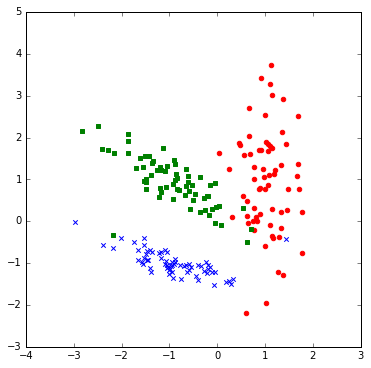

In [3]:
X,y = ds.make_classification(n_features=2, 
                             n_redundant=0, 
                             n_informative=2,
                             n_clusters_per_class=1,
                             n_classes=3,
                             n_samples=200,
                             random_state=3216)
ix0 = [i for i,x in enumerate(y) if x == 0]
ix1 = [i for i,x in enumerate(y) if x == 1]
ix2 = [i for i,x in enumerate(y) if x == 2]
fig = plt.figure(figsize=(6,6))
#ax = plt.axes(xlim=(-3.1, 3.1), ylim=(-3.1, 3.1))
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.scatter(X[ix2,0],X[ix2, 1],marker='s',color='green')
plt.show()

Training the softmax regression is easy as before:

In [4]:
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(X,y)
print 'Intercepts:'
print model.intercept_
print 'Coefficients:'
print model.coef_

Intercepts:
[-0.10153312 -0.56865552  0.67018864]
Coefficients:
[[ 2.80913084  1.10436996]
 [-1.8280927  -2.14320504]
 [-0.98103814  1.03883507]]


It is possible to get probabilities from the model using the method ```predict_proba()```, but I have implemented the function ```softmax_probs()``` to evaluate probabilities with ```model.intercept_``` and ```model.coeff_``` attributes.

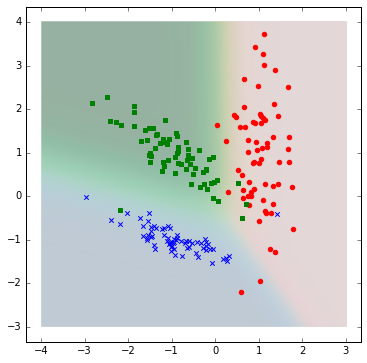

In [5]:
def softmax_probs(X, model):
    Xb = np.hstack((np.ones((X.shape[0],1)), X))
    thetas = np.hstack((model.intercept_.reshape((-1,1)), model.coef_))
    probs = np.exp(np.dot(Xb, np.transpose(thetas)))
    probs_sums = probs.sum(axis=1)
    probs = probs / probs_sums[:, np.newaxis]
    return probs

x1 = np.arange(-4.0, 3.0, 0.05)
x2 = np.arange(-3.0, 4.0, 0.05)
x1,x2 = np.meshgrid(x1, x2)
y_pred = softmax_probs(np.c_[x1.ravel(), x2.ravel()], model)
extent = -4.0, 3.0, -3.0, 4.0

fig = plt.figure(figsize=(10,6))
plt.imshow(y_pred[:,0].reshape(x1.shape), cmap=cm.Reds, alpha=.4, interpolation='bilinear',
           extent = extent, origin='lower')
plt.imshow(y_pred[:,1].reshape(x1.shape), cmap=cm.Blues, alpha=.4, interpolation='bilinear',
           extent = extent, origin='lower')
plt.imshow(y_pred[:,2].reshape(x1.shape), cmap=cm.Greens, alpha=.4, interpolation='bilinear',
           extent = extent, origin='lower')
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.scatter(X[ix2,0],X[ix2, 1],marker='s',color='green')
plt.show()

And another way to visualize it:

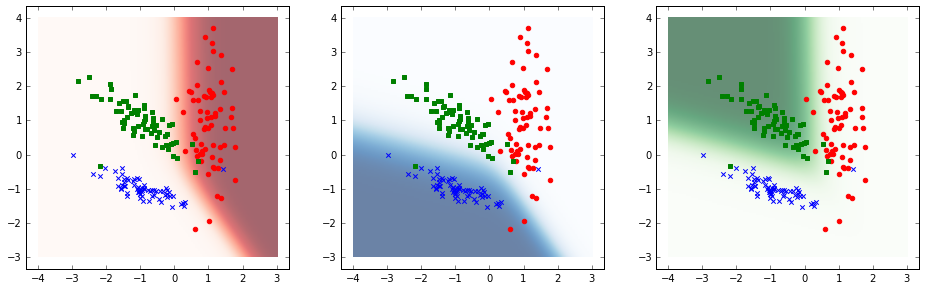

In [6]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(131)
plt.imshow(y_pred[:,0].reshape(x1.shape), cmap=cm.Reds, alpha=.6, interpolation='bilinear',
           extent = extent, origin='lower')
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.scatter(X[ix2,0],X[ix2, 1],marker='s',color='green')

fig.add_subplot(132)
plt.imshow(y_pred[:,1].reshape(x1.shape), cmap=cm.Blues, alpha=.6, interpolation='bilinear',
           extent = extent, origin='lower')
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.scatter(X[ix2,0],X[ix2, 1],marker='s',color='green')

fig.add_subplot(133)
plt.imshow(y_pred[:,2].reshape(x1.shape), cmap=cm.Greens, alpha=.6, interpolation='bilinear',
           extent = extent, origin='lower')
plt.scatter(X[ix0,0],X[ix0, 1],marker='o',color='red')
plt.scatter(X[ix1,0],X[ix1, 1],marker='x',color='blue')
plt.scatter(X[ix2,0],X[ix2, 1],marker='s',color='green')

plt.show()